In [2]:
import pandas as pd
import numpy as np
import os
from Pscripts import project_functions # This is called a relative import
df = project_functions.load_and_process('analysis/Pavni/Medical_Cost.csv')


In [3]:
df.describe(include = [object]).T

,count,unique,top,freq
Gender,1338,2,male,676
Tobacco User,1338,2,no,1064
Medical Costs per region,1338,1337,$1639.56,2
Region,1338,4,southeast,364


In [4]:
df.describe(exclude = [object]).T

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.0,27.0,39.0,51.0,64.0
Children,1338.0,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
BMI,1338.0,30.663677,6.096007,16.0,26.0,30.0,35.0,53.0


In [5]:
import pandas_profiling as pdp
pdp.ProfileReport(df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

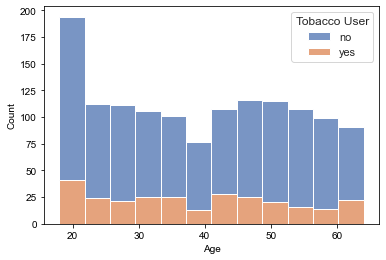

In [6]:
#This plot tells the number of people with same age and their usage of Tobacco
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
sns.set_theme(style="ticks")
sns.histplot(x='Age',hue = 'Tobacco User',multiple = 'stack',data = df)

<ipython-input-7-ea9608864261>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['Medical Costs per region'] = df1['Medical Costs per region'].str.replace('$','')


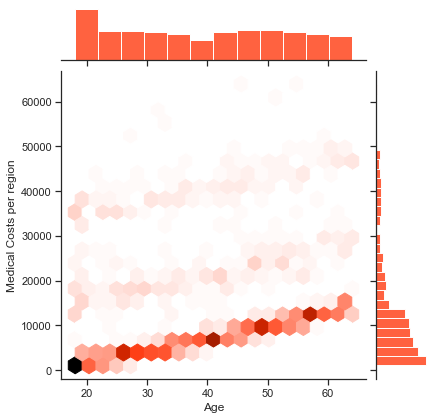

In [7]:
#This plot gives us the insight of costs based on Age.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1 = df.copy()
df1['Medical Costs per region'] = df1['Medical Costs per region'].str.replace('$','')
df1['Medical Costs per region'] = df1['Medical Costs per region'].astype(float)
sns.jointplot(x = 'Age', y = "Medical Costs per region",kind = 'hex',color = '#FF2D00', data = df1)

<ipython-input-8-5ce1dda500c6>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['Medical Costs per region'] = df1['Medical Costs per region'].str.replace('$','')


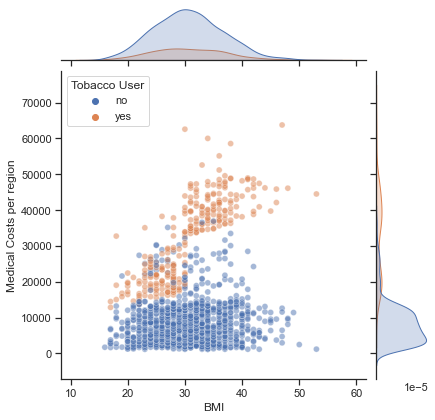

In [8]:
#This plot is between BMI and costs and if the person is a tobacco user.From this graph we can tell that the tobacco users have more medical costs.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1 = df.copy()
df1['Medical Costs per region'] = df1['Medical Costs per region'].str.replace('$','')
df1['Medical Costs per region'] = df1['Medical Costs per region'].astype(float)
sns.jointplot(data = df1 , x = 'BMI', y = 'Medical Costs per region',hue = 'Tobacco User',alpha = 0.5)

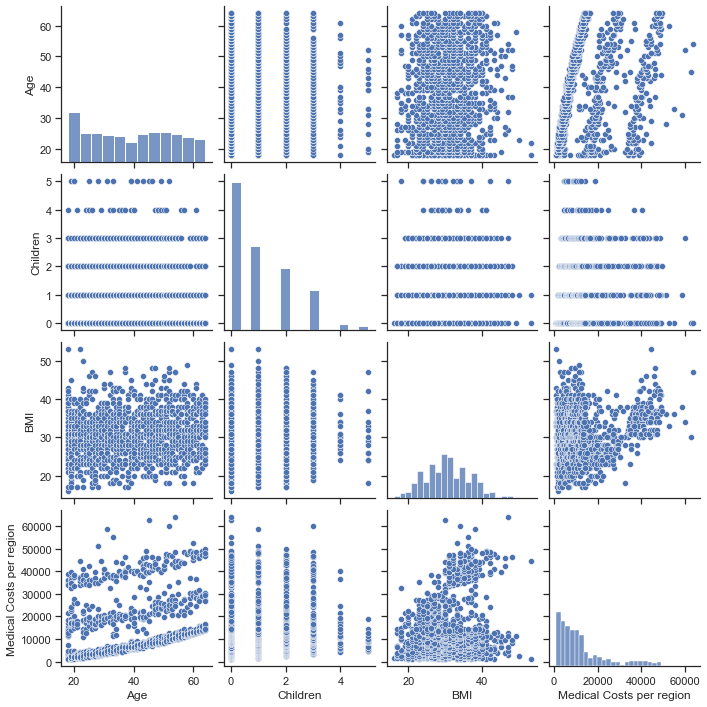

In [9]:
sns.pairplot(data = df1)

<AxesSubplot:xlabel='Region', ylabel='Medical Costs per region'>

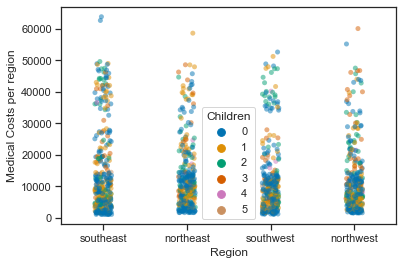

In [10]:
#The following plot gives us insight on the medical costs per region with their any correlation with number of children.
sns.stripplot(data = df1,y ='Medical Costs per region', x = 'Region',hue = 'Children', palette = 'colorblind' , alpha = 0.5 )
#Looks likes in southeast people with no children have medical costs above 60000

<AxesSubplot:xlabel='Gender', ylabel='Count'>

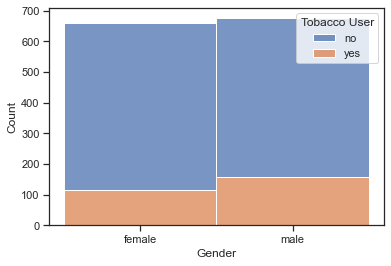

In [11]:
sns.histplot(data = df,x = 'Gender', hue = 'Tobacco User' , multiple = 'stack' )
#This plot tells us of there are more female tobacco users for more male tobacco users.

<AxesSubplot:xlabel='BMI', ylabel='Medical Costs per region'>

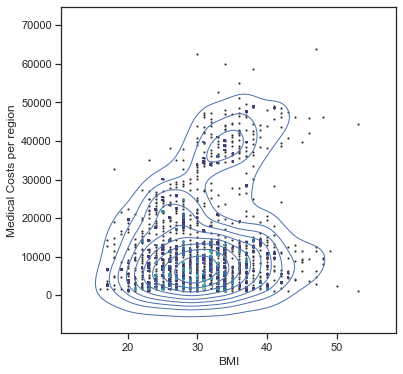

In [21]:
# This plot draws a combo histogram and scatterplot with density contours between costs and BMI
f,ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x = 'BMI', y = "Medical Costs per region", data = df1,s = 5,color = '.15')
sns.histplot(x = 'BMI', y = "Medical Costs per region", data = df1,bins = 150,pthresh = .1,cmap = 'mako')
sns.kdeplot(x = 'BMI', y = "Medical Costs per region", data = df1,levels = 10,color = 'b',linewidths= 1)

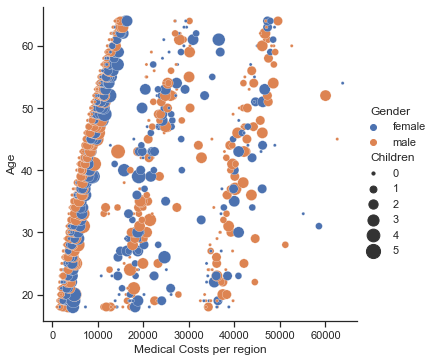

In [37]:
sns.relplot(x = 'Medical Costs per region', y = 'Age',hue = 'Gender',data = df1,size = 'Children',sizes = (10,200))
#This plot tells us the relation between costs, age,gender and children.